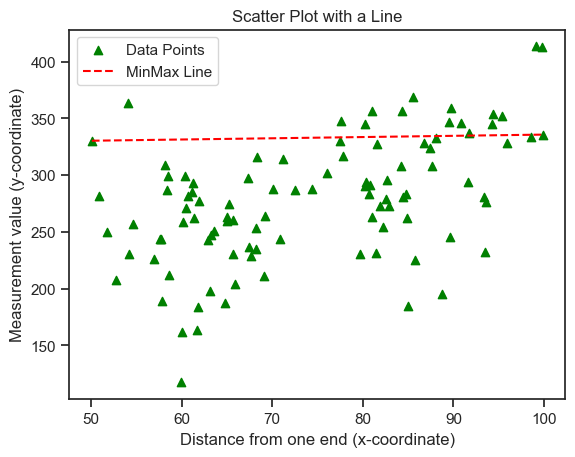

In [3]:
#Q.1
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv('scatter_data.csv')

plt.scatter(data1['% x'], data1[' y '], color='green', marker='^', label='Data Points')

sorted_data1 = data1.sort_values(by='% x')
plt.plot([sorted_data1['% x'].iloc[0], sorted_data1['% x'].iloc[-1]],
         [sorted_data1[' y '].iloc[0], sorted_data1[' y '].iloc[-1]],
         color='red', linestyle='--', label='MinMax Line')

plt.title('Scatter Plot with a Line')

plt.xlabel('Distance from one end (x-coordinate)')
plt.ylabel('Measurement value (y-coordinate)')

plt.legend()
plt.show()

In [4]:
#Q.2
data1 = pd.read_csv("C:/Users/DELL/Documents/student_grades.csv")
data1
data1.columns = data1.columns.str.strip()

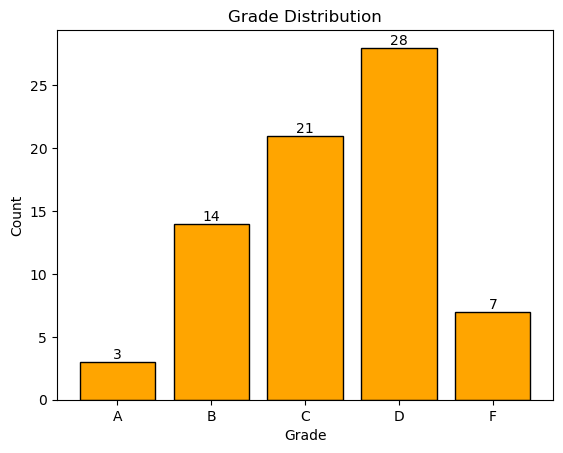

In [11]:
score = [(90, 100), (80, 90), (70, 80), (60, 70), (0, 60)]
label = ['A', 'B', 'C', 'D', 'F']
data1['grade_category'] = pd.cut(data1['avgScore'],
                                       bins=[0, 60, 70, 80, 90, 101],
                                       labels=label,
                                       right=False) 
grades = data1['grade_category'].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


In [5]:
#Q.3
data1 = pd.read_csv("C:/Users/DELL/Documents/solution_data.csv")
data1.columns = data1.columns.str.strip()

In [6]:
optimal = data1[data1["SolnMethod"] == "optimal"]
merge = data1.merge(optimal, on = '% Problem', suffixes = ('', 'optimal'))
merge['optimality_gap'] = ((merge['Valueoptimal'] - merge['Value'])/merge['Valueoptimal'])*100
heuristic = merge[merge['SolnMethod'] != 'optimal']
average = heuristic.groupby('SolnMethod')['optimality_gap'].mean().reset_index()
boxplot = heuristic.groupby('SolnMethod')['optimality_gap'].apply(list).reset_index(name='optimality_gap')

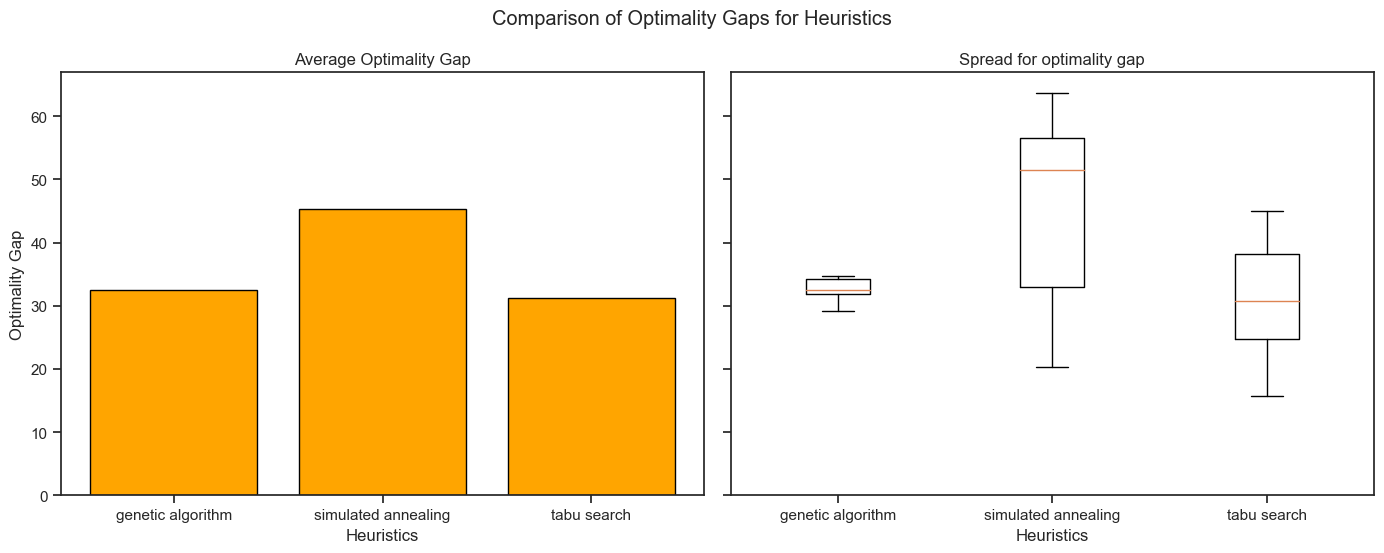

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(average['SolnMethod'], average['optimality_gap'], color = 'orange', edgecolor = 'black')
ax1.set(title = 'Average Optimality Gap', xlabel = 'Heuristics', ylabel = 'Optimality Gap')

boxplot_data = [row['optimality_gap'] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title = 'Spread for optimality gap', xlabel = 'Heuristics', xticklabels = boxplot['SolnMethod'])

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()

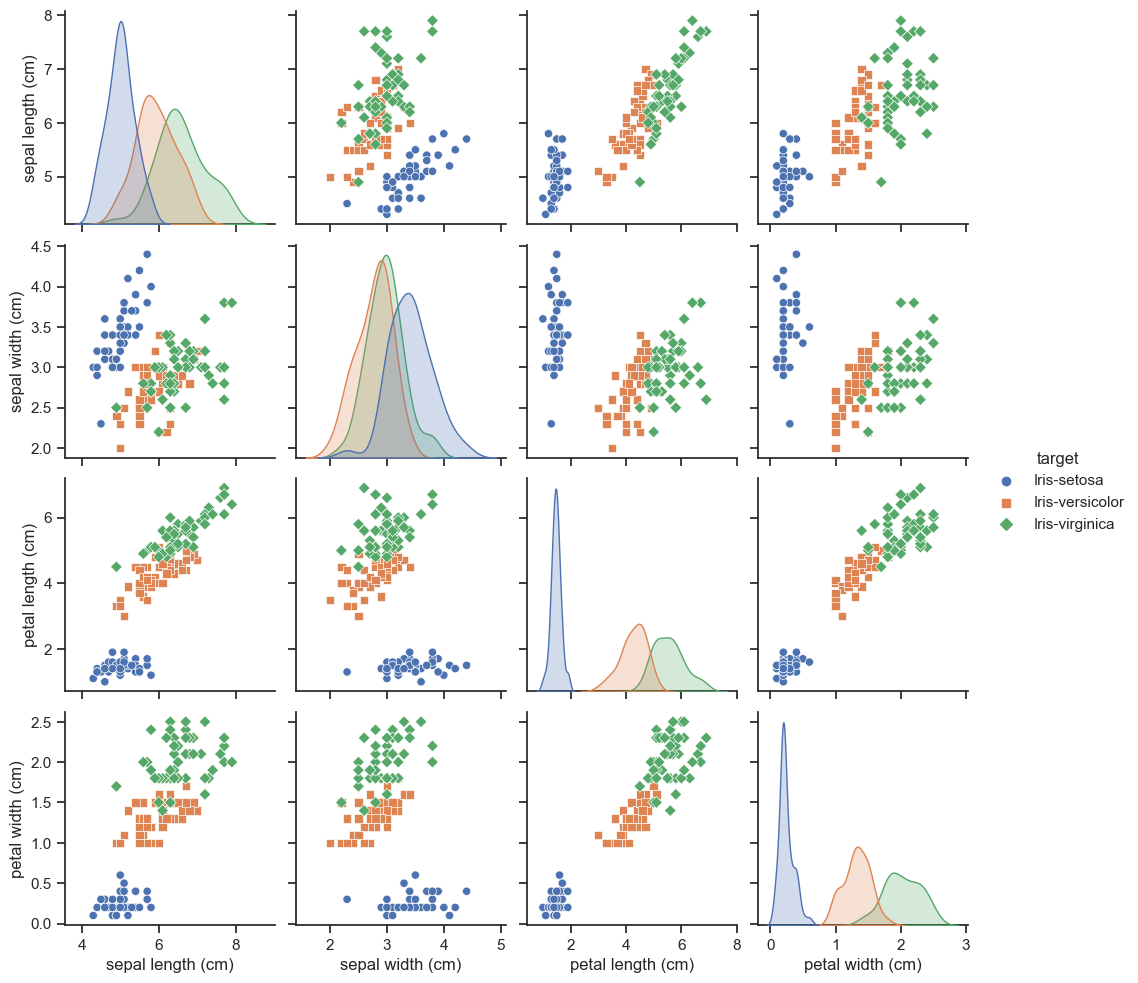

In [8]:
#Q.4 

#Dataset URL:
#https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the Iris dataset from the CSV file
iris_df = pd.read_csv("iris_dataset.csv")

# Create a pairplot
sns.set(style="ticks")
sns.pairplot(iris_df, hue="target", markers=["o", "s", "D"])

# Show the plot
plt.show()


In [ ]:
#This code leverages the Seaborn, Pandas, and Matplotlib libraries to generate a pairplot of the Iris dataset, which is read from a CSV file. The CSV file should contain columns for sepal length, sepal width, petal length, petal width, and the target (species). The code first imports the necessary libraries, including Seaborn for data visualization. It then reads the dataset into a Pandas DataFrame. The Seaborn pairplot function is employed to create a grid of scatterplots that visualize the relationships between pairs of variables. The "hue" parameter colors the data points based on the species (Iris-setosa, Iris-versicolor, or Iris-virginica), and different markers are used to distinguish each species on the plot. Finally, the Matplotlib library is used to display the pairplot, providing a comprehensive visualization of the Iris dataset's features and species relationships